<a href="https://colab.research.google.com/github/rahlgpta/ForrestFireDetection/blob/main/Forrest_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
zip_file_path = '/content/drive/MyDrive/Dataset.zip'

In [4]:
extracted_path = '/content/dataset/'

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [5]:
train_data_dir = os.path.join(extracted_path, 'Forest Fire Dataset', 'Training')
test_data_dir = os.path.join(extracted_path, 'Forest Fire Dataset', 'Testing')

In [6]:
batch_size = 32
img_height, img_width = 250, 250

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

Found 1520 images belonging to 2 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs)


Epoch 1/10
48/48 [==============================] - 244s 5s/step - loss: 0.4327 - accuracy: 0.8625
Epoch 2/10
48/48 [==============================] - 240s 5s/step - loss: 0.1775 - accuracy: 0.9355
Epoch 3/10
48/48 [==============================] - 230s 5s/step - loss: 0.1451 - accuracy: 0.9572
Epoch 4/10
48/48 [==============================] - 232s 5s/step - loss: 0.1307 - accuracy: 0.9586
Epoch 5/10
48/48 [==============================] - 233s 5s/step - loss: 0.1210 - accuracy: 0.9572
Epoch 6/10
48/48 [==============================] - 234s 5s/step - loss: 0.1011 - accuracy: 0.9632
Epoch 7/10
48/48 [==============================] - 232s 5s/step - loss: 0.1232 - accuracy: 0.9579
Epoch 8/10
48/48 [==============================] - 233s 5s/step - loss: 0.1053 - accuracy: 0.9645
Epoch 9/10
48/48 [==============================] - 233s 5s/step - loss: 0.0634 - accuracy: 0.9816
Epoch 10/10
48/48 [==============================] - 232s 5s/step - loss: 0.0542 - accuracy: 0.9803


In [12]:
model.save('/content/drive/MyDrive/forest_fire_classifier.h5')


In [13]:
model = tf.keras.models.load_model('/content/drive/MyDrive/forest_fire_classifier.h5')


In [14]:
test_image_paths = [os.path.join(test_data_dir, img) for img in os.listdir(test_data_dir)]


In [17]:
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img)

In [21]:
test_images = np.array(test_images)
test_predictions = model.predict(test_images)

12/12 [==============================] - 27s 2s/step


In [23]:
for i in range(len(test_predictions)):
    predicted_label = "Non-Fire" if test_predictions[i] > 0.5 else "Fire"
    confidence = test_predictions[i][0] if predicted_label == "Non-Fire" else 1 - test_predictions[i][0]
    print(f"Image: {test_image_paths[i]}, Predicted Label: {predicted_label}, Confidence: {confidence}")

Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0237.jpg, Predicted Label: Non-Fire, Confidence: 0.9999112486839294
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0831.jpg, Predicted Label: Non-Fire, Confidence: 0.9968569874763489
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0398.jpg, Predicted Label: Fire, Confidence: 0.9859888069331646
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0413.jpg, Predicted Label: Fire, Confidence: 0.8710074573755264
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0379.jpg, Predicted Label: Non-Fire, Confidence: 0.9960350394248962
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0730.jpg, Predicted Label: Non-Fire, Confidence: 0.9996612071990967
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0921.jpg, Predicted Label: Non-Fire, Confidence: 0.9976954460144043
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0370.jpg, Predicted Label: Non-Fire, Confidence: 0.9998585581779

In [54]:
random_index = random.randint(0, len(test_image_paths) - 1)
random_image = load_img(test_image_paths[random_index], target_size=(img_height, img_width))
random_image_array = img_to_array(random_image) / 255.0

In [55]:
random_prediction = model.predict(np.expand_dims(random_image_array, axis=0))
predicted_label = "Non-Fire" if random_prediction > 0.5 else "Fire"
confidence = random_prediction[0][0] if predicted_label == "Non-Fire" else 1 - random_prediction[0][0]


1/1 [==============================] - 0s 114ms/step


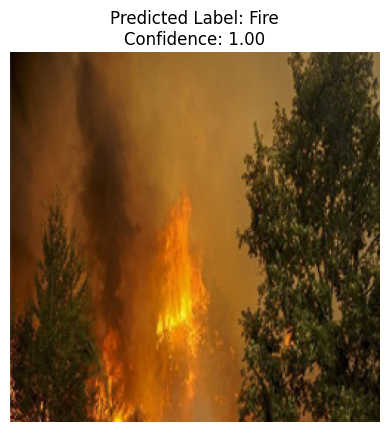

In [56]:
plt.imshow(random_image)
plt.title(f"Predicted Label: {predicted_label}\nConfidence: {confidence:.2f}")
plt.axis('off')
plt.show()